<a href="https://colab.research.google.com/github/MohammedEsamaldin/abtest-mlops/blob/main/EDA_Notebooks/AB_classical_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.path.insert(0,'../scripts/')
#from DistributionPlots import DistributionPlots
import warnings
warnings.filterwarnings(action="ignore")

ModuleNotFoundError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AdSmartABdata.csv',na_values= ['?',None])
df.isnull().sum().head(10)


Mounted at /content/drive


auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [5]:
# Dropping observations where there was no response to the presented questionaire
dp = df.query('yes==0 and no==0')
df = df.drop(dp.index)
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


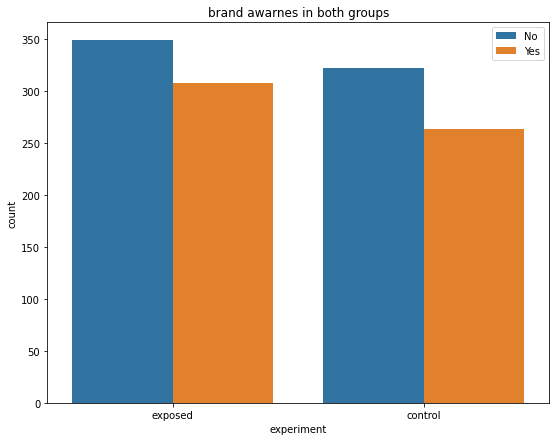

In [9]:
# Counting the people that are aware of the brand in both groups
plt.figure(figsize=(9,7))
axis = sns.countplot(x='experiment', hue='yes', data=df)
axis.set_title('brand awarnes in both groups')
plt.legend(['No', 'Yes'])

([<matplotlib.patches.Wedge at 0x7fab81e77c90>,
 [Text(-0.9908102930560425, 0.47780222181798127, 'Generic Smartphone'),
  Text(0.8195688791579974, -0.7336939772927841, 'Samsung SM-G960F'),
  Text(0.9995816413521881, -0.45916940476436985, 'Samsung SM-G950F'),
  Text(1.0741603235269193, -0.2370223604653036, 'Samsung SM-G973F'),
  Text(1.0975024172535426, -0.0740840341951703, 'Samsung SM-A202F')],
 [Text(-0.5404419780305686, 0.26061939371889886, '85.7%'),
  Text(0.4470375704498167, -0.40019671488697306, '5.4%'),
  Text(0.5452263498284662, -0.2504560389623835, '4.2%'),
  Text(0.5859056310146832, -0.12928492389016558, '2.6%'),
  Text(0.5986376821382959, -0.04040947319736561, '2.1%')])

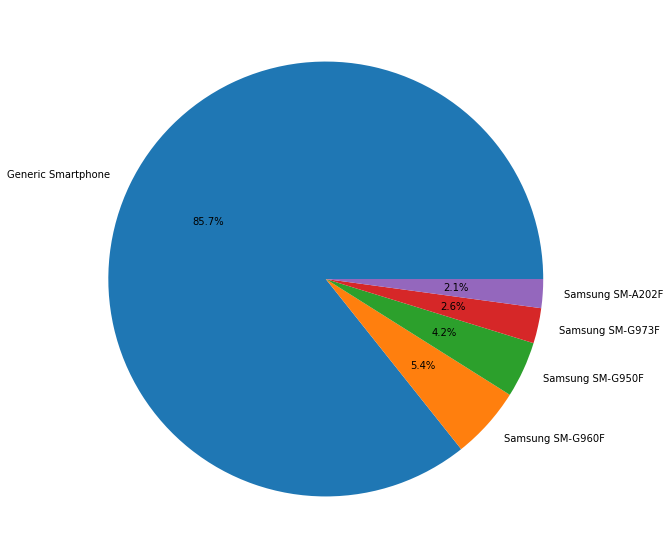

In [17]:
# Top 5 Devices
t5_device = df['device_make'].value_counts().nlargest(5)
fig1,ax1 = plt.subplots(figsize=(10,10))
ax1.pie(t5_device.values, labels=t5_device.index, autopct='%1.1f%%')

[Text(0, 0, 'Chrome Mobile WebView'),
 Text(0, 0, 'Chrome Mobile'),
 Text(0, 0, 'Facebook'),
 Text(0, 0, 'Samsung Internet'),
 Text(0, 0, 'Mobile Safari'),
 Text(0, 0, 'Chrome'),
 Text(0, 0, 'Mobile Safari UI/WKWebView'),
 Text(0, 0, 'Chrome Mobile iOS')]

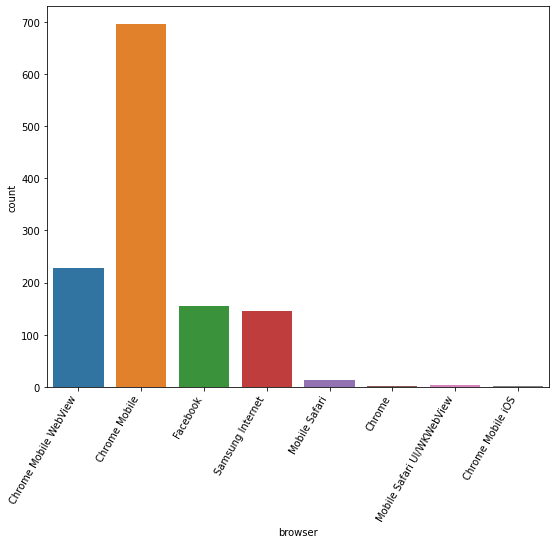

In [10]:
# Count plot of browsrs
plt.figure(figsize=(9,7))
axis = sns.countplot(x='browser', data=df)
axis.set_xticklabels(axis.get_xticklabels(), rotation=60, ha='right')

Text(0.5, 1.0, 'Distribution fo Hour')

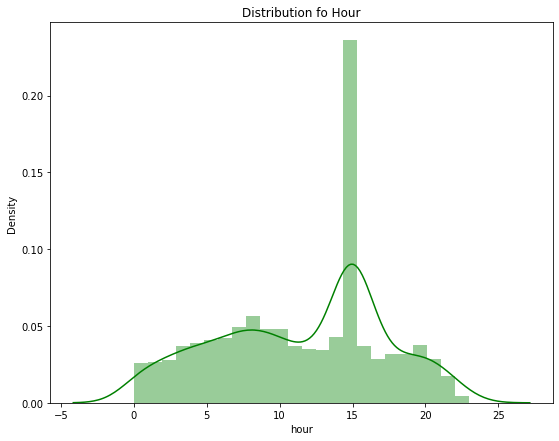

In [16]:

# Distribution of Hour
plt.figure(figsize=(9,7))
axis = sns.distplot(df['hour'],bins=24, color='green')
plt.title('Distribution fo Hour')

In [19]:
#  aware people vs the total people
expo_yes = df.query('experiment == "exposed"').yes
expo_count = len(expo_yes)
expo_yes_count = expo_yes.sum(axis=0)

cont_yes = df.query('experiment == "control"').yes
cont_count = len(cont_yes)
cont_yes_count = cont_yes.sum(axis=0)
print('Control yes count:',expo_yes_count)
print('Total Control:',cont_count)
print('Exposed yes count:',expo_yes_count)
print('Total Exposed:',expo_count)

Control yes count: 308
Total Control: 586
Exposed yes count: 308
Total Exposed: 657


In [20]:
import statsmodels.stats.api as sms 
baseline_rate = cont_yes_count / cont_count
practical_significance = 0.01  # minimum required effect size
confidence_level = 0.05 
sensitivity = 0.8 

effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
sample_size = sms.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)
print("Required sample size: ", round(sample_size), " per group")

Required sample size:  38932  per group


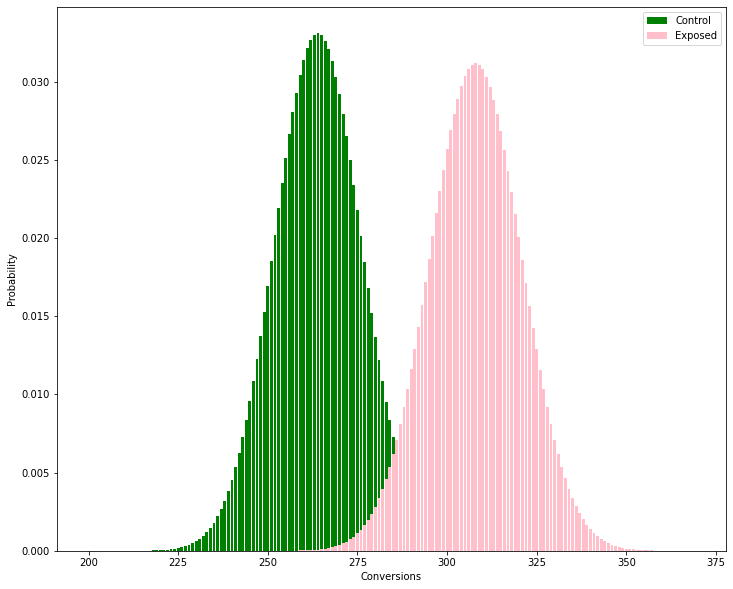

In [25]:
from scipy.stats import binom
# Calculate the Conversions for each group
cv_rate_control, cv_rate_exposed = cont_yes_count / cont_count, expo_yes_count / expo_count
range = np.arange(200, 370)
cv_prob_control = binom(cont_count, cv_rate_control).pmf(range)
cv_prob_exposed = binom(expo_count, cv_rate_exposed).pmf(range)
fig, ax = plt.subplots(figsize=(12,10))
plt.bar(range, cv_prob_control, label="Control",color='green')
plt.bar(range, cv_prob_exposed, label="Exposed",color='pink')
plt.legend()
plt.xlabel("Conversions"); plt.ylabel("Probability");

In [26]:
std_control = np.sqrt(cv_rate_control * (1 - cv_rate_control) / cont_count)
std_exposed = np.sqrt(cv_rate_exposed * (1 - cv_rate_exposed) / expo_count)

SE_control = np.sqrt(cv_rate_control * (1-cv_rate_control)) / np.sqrt(cont_count)
SE_exposed = np.sqrt(cv_rate_exposed * (1-cv_rate_exposed)) / np.sqrt(expo_count)
print(std_control, SE_control)

0.02055339057798332 0.02055339057798332


Text(0, 0.5, 'Probability')

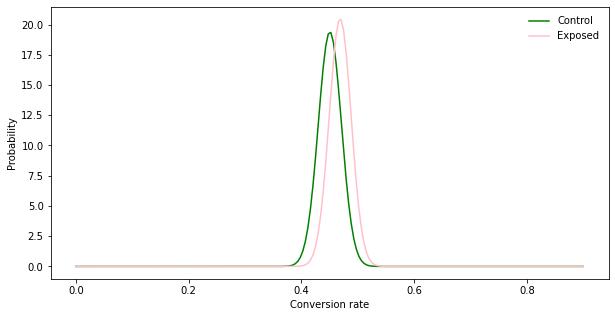

In [28]:
from scipy.stats import norm
conversion_rate = np.linspace(0, 0.9, 200)
prob_a = norm(cv_rate_control, SE_control).pdf(conversion_rate)
prob_b = norm(cv_rate_exposed, SE_exposed).pdf(conversion_rate)
plt.figure(figsize=(10,5))
plt.plot(conversion_rate, prob_a, label="Control",color = 'green')
plt.plot(conversion_rate, prob_b, label="Exposed",color = 'pink')
plt.legend(frameon=False)
plt.xlabel("Conversion rate"); plt.ylabel("Probability")

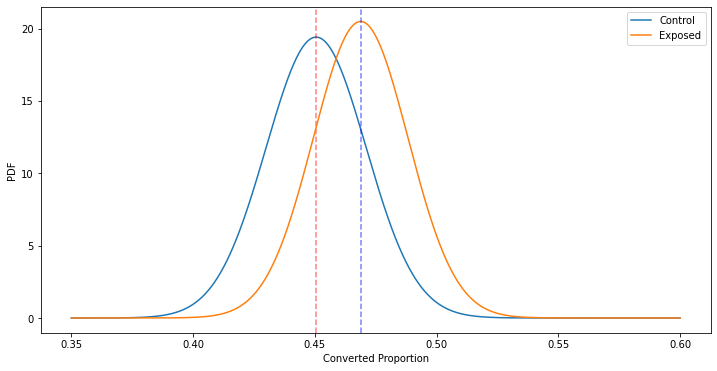

In [29]:
import scipy.stats as scs

fig, ax = plt.subplots(figsize=(12, 6))
x = np.linspace(.35, .6, 1000)

yC = scs.norm(cv_rate_control, SE_control).pdf(x)
ax.plot(x, yC, label='Control')
ax.axvline(x=cv_rate_control, c='red', alpha=0.5, linestyle='--')

yE = scs.norm(cv_rate_exposed, SE_exposed).pdf(x)
ax.plot(x, yE, label='Exposed')
ax.axvline(x=cv_rate_exposed, c='blue', alpha=0.5, linestyle='--')

plt.legend()
plt.xlabel('Converted Proportion') # conversion rate
plt.ylabel('PDF') # probability density function
plt.show()

In [31]:
#calculate variance of sum
var_cont = np.sqrt(cv_rate_control * (1 - cv_rate_control) / cont_count)
var_exp = np.sqrt(cv_rate_exposed * (1 - cv_rate_exposed) / expo_count)
var_cont, var_exp

(0.02055339057798332, 0.019468837373132736)

In [36]:
diff = cv_rate_exposed - cv_rate_control
z_score = (diff) / np.sqrt(var_cont**2 + var_exp**2)
print(f"zscore is {z_score:0.5f}, with p-value {scs.norm().sf(z_score):0.5f}")

zscore is 0.64590, with p-value 0.25917


In [37]:
hypo_plots.zplot(area=0.95)

NameError: ignored